# Lab 8: Define and Solve an ML Problem of Your Choosing

In [9]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [10]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

# YOUR CODE HERE
df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. We selected the Airbnb NYC Listings Dataset (airbnbListingsData), which includes listing-level details such as host activity, pricing, reviews, and availability.

2. We aim to predict "review_scores_value", which reflects how guests rate the value of a listing after their stay. 

3. This is a supervised learning problem because we are using labeled data with a define output variable. It is a regression problem, as "review_scores_value" is a continuous numerical variable. It is not a classification or clustering problem.

4. We will be using multiple features including calculated_host_listings_count, accommodates, minimum_nights, avilability_365, host_is_super_host, and instant_bookable. 

5. We plan to explore whether there's a relationship between a host's number of listings and their average value rating to see if large-scale hosts offer better or worse perceived value. This insight could help Airbnb better understand the dynamics of professional vs. individual hosts, improve guest recommendations, and guide platform strategy to ensure equality and trust at scale. 

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. To prepare our data for modeling, we used the following techniques:
- Addressing Missingness
- Selecting appropriate features
- Identifying and understanding outliers

2.  We chose a Random Forest Regressor for the reasons that it handles nonlinear relationship well, it is robust to outliers and doesn't require feature scaling, and finally it performs well on small datasets with minimal parameter tuning. Since Random Forests are not sensitive to feature scale, scaling was not necessary. However, we ensured a balanced modeling dataset by imputing missing values and cleaning feature-label pairs.

3. We will evaluate model performance using root mean square error, and coefficient of determination. To improve the model we may use hyperparameter tuning, explore feature engineering such as binning host_listings_count, or including additional listing level variable. 

In [11]:
# YOUR CODE HERE
print("Data Info:\n")
print(df[["review_scores_value", "calculated_host_listings_count", "accommodates", "minimum_nights", "availability_365", "host_is_superhost", "instant_bookable"]].info())

Data Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28022 entries, 0 to 28021
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   review_scores_value             28022 non-null  float64
 1   calculated_host_listings_count  28022 non-null  int64  
 2   accommodates                    28022 non-null  int64  
 3   minimum_nights                  28022 non-null  int64  
 4   availability_365                28022 non-null  int64  
 5   host_is_superhost               28022 non-null  bool   
 6   instant_bookable                28022 non-null  bool   
dtypes: bool(2), float64(1), int64(4)
memory usage: 1.1 MB
None


In [12]:
print("Missing values:")
print(df[["review_scores_value", "calculated_host_listings_count", "accommodates", "minimum_nights", "availability_365", "host_is_superhost", "instant_bookable"]].isnull().sum())

Missing values:
review_scores_value               0
calculated_host_listings_count    0
accommodates                      0
minimum_nights                    0
availability_365                  0
host_is_superhost                 0
instant_bookable                  0
dtype: int64


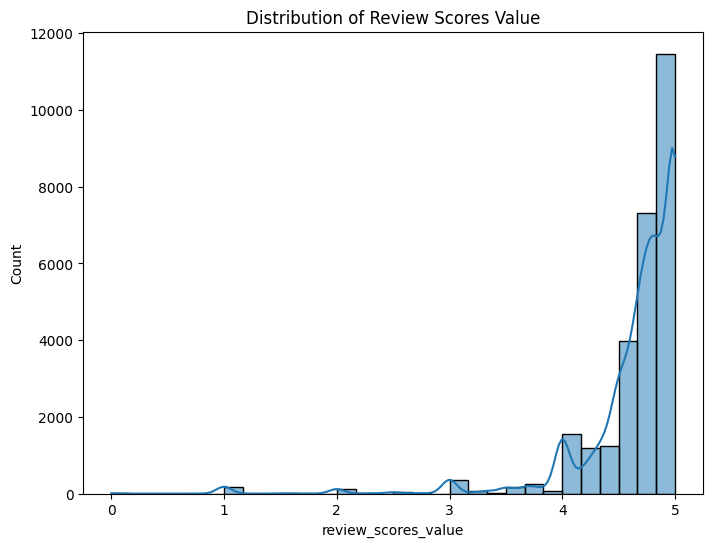

In [13]:
plt.figure(figsize = (8, 6))
sns.histplot(df["review_scores_value"], bins = 30, kde = True)
plt.title("Distribution of Review Scores Value")
plt.show()

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. After exploring the data, we decided to keep all the features specificed above. 

2. We performed the following steps:
- Drop rows with missing labels
- Converted boolean columns to numeric (0/1)

3. We will use a linear regression model as well as a random forest regressor.

4. Out plan is as follows:
- split the data into training and test sets
- Train the Random Forest model on the training data
- Evaluate performance using RMSE and R2 on the test set
- If performance is weak we will try hyperparameter tuning, or consider transforming or binning the host_listings_count. We can also try to explore adding new features to expand the scope.
- Compare performance with Linear Regression to assess if the relationship is lienar and simpler model suffice.


We also plan to improve the model using tuning parameters. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

Task: Use the rest of this notebook to carry out your project plan.

You will:

Prepare your data for your model.
Fit your model to the training data and evaluate your model.
Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.
Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit.

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Linear Regression Metrics:
[LR] Root Mean Squared Error: 0.5087496347397239
[LR] R2: 0.025431373545889202
Model Evaluation Metrics:
Root Mean Squared Error: 0.5261343337257078
R2: -0.0423114103596558


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


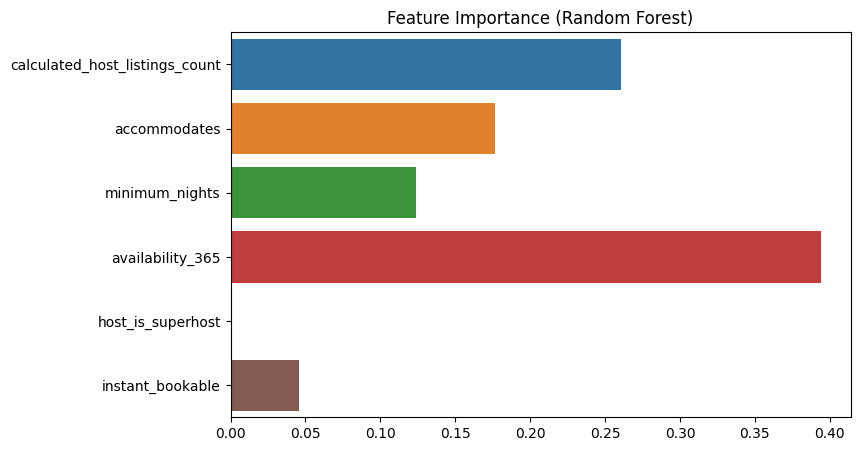

In [14]:
# YOUR CODE HERE
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

#define features and label
features = ["calculated_host_listings_count", "accommodates", "minimum_nights", "availability_365", "host_is_superhost", "instant_bookable"]
df = df[features + ["review_scores_value"]]

y = df["review_scores_value"]
X = df.drop("review_scores_value", axis = 1)

#Create training and test sets out of the labeled examples. Create a test set that is 30% of the size of the dataset. 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

#Initialize a scikit-learn LinearRegression model object with no arguments, and fit the model to the training data
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

#Test your model on the test set (X_test). Call the predict() method to use the fitted model to generate a vector of predictions on the test set. 
y_lr_pred = lr_model.predict(X_test)

#Compute RMSE
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)

#Computer the R2 Score
lr_r2 = r2_score(y_test, y_lr_pred)

print("Linear Regression Metrics:")
print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

#Initialize a RandomForestRegressor model object. Fit the model to the training data.
rf_model = RandomForestRegressor(max_depth=16, n_estimators=300)
rf_model.fit(X_train, y_train)

# Use the predict() method to test your model rf_model on the test set X_test. Evaluate the results by computing the RMSE and R2 score in the same manner as you did above.
#1. Use the fitted model to make predictions on the test data
y_rf_pred = rf_model.predict(X_test)

#2. Compute RMSE
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)

#3 Compute the R2 score
rf_r2 = r2_score(y_test, y_rf_pred)

print("Model Evaluation Metrics:")
print("Root Mean Squared Error: {0}".format(rf_rmse))
print("R2: {0}".format(rf_r2))

#Gain insight into which features contribute most to predicting review scores by visualizing feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title("Feature Importance (Random Forest)")
plt.show()

In [15]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, None]
}

rf = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    cv=3,
    scoring='neg_root_mean_squared_error',
    n_jobs=-1  # use all CPU cores
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, None], 'n_estimators': [100, 200]},
             scoring='neg_root_mean_squared_error')

Final Predictions + Evaluation: 

In [16]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Predict on test set using the best model from GridSearchCV
y_pred = grid_search.predict(X_test)

# Evaluate model performance
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# Print results
print("Final Model Performance:")
print("Root Mean Squared Error (RMSE):", rmse)
print("R² Score:", r2)

Final Model Performance:
Root Mean Squared Error (RMSE): 0.5037541750158253
R² Score: 0.04447616990897929


## Final Conclusion

In this project, I explored a supervised regression problem using the Airbnb listings dataset, aiming to predict a host's average value rating based on key listing and host features. After building and cleaning the dataset, I applied both a baseline Linear Regression model and a more complex Random Forest model. Finally, I performed hyperparameter tuning using GridSearchCV to improve model performance.

The best model (tuned Random Forest) achieved a low Root Mean Squared Error (RMSE ≈ 0.50), indicating that the model's predictions are close to the true values on average. However, the R² score was relatively low (~0.04), suggesting the model captures only a small portion of the variance in the target variable. This may be due to label imbalance, limited variation in review scores, or a lack of highly predictive features in the dataset.

Despite this, the project demonstrates a full machine learning workflow: from data loading and EDA to model building, evaluation, and optimization. Future work could explore additional features (e.g., text reviews or host response time), more advanced models, or resampling strategies to address potential imbalances and further improve predictive performance.